In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
Goal4 = pd.read_csv('Goal4.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,9,16,17,19,21,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# converting the file to DF and dropping the columns we don't need 
df = pd.DataFrame(Goal4)
df = df[["Goal","Target","Indicator","SeriesDescription","GeoAreaName","TimePeriod","Value","Sex","Education level","Type of skill"]]
# sampling the data 
df[df['Indicator'] == '4.1.1']

,Goal,Target,Indicator,SeriesDescription,GeoAreaName,TimePeriod,Value,Sex,Education level,Type of skill
0,4,4.1,4.1.1,Proportion of children and young people achiev...,Afghanistan,2013,11.000000,BOTHSEX,PRIMAR,SKILL_MATH
1,4,4.1,4.1.1,Proportion of children and young people achiev...,Afghanistan,2013,13.000000,BOTHSEX,PRIMAR,SKILL_READ
2,4,4.1,4.1.1,Proportion of children and young people achiev...,Afghanistan,2016,21.500000,MALE,GRAD23,SKILL_READ
3,4,4.1,4.1.1,Proportion of children and young people achiev...,Afghanistan,2016,22.500000,FEMALE,GRAD23,SKILL_READ
4,4,4.1,4.1.1,Proportion of children and young people achiev...,Afghanistan,2016,22.000000,BOTHSEX,GRAD23,SKILL_READ
...,...,...,...,...,...,...,...,...,...,...
3984,4,4.1,4.1.1,Proportion of children and young people achiev...,Zambia,2015,5.043495,BOTHSEX,LOWSEC,SKILL_READ
3985,4,4.1,4.1.1,Proportion of children and young people achiev...,Zambia,2015,1.942508,MALE,LOWSEC,SKILL_MATH
3986,4,4.1,4.1.1,Proportion of children and young people achiev...,Zambia,2015,2.634564,FEMALE,LOWSEC,SKILL_MATH
3987,4,4.1,4.1.1,Proportion of children and young people achiev...,Zambia,2015,2.298457,BOTHSEX,LOWSEC,SKILL_MATH


In [5]:
# checking the descriptions to see the type of data
df.value_counts(df['SeriesDescription'])

SeriesDescription
Completion rate, by sex, location, wealth quintile and education level (%)                                                                                                                                                                       76351
Adjusted gender parity index for completion rate, by sex, location, wealth quintile and education level                                                                                                                                          24268
Adjusted location parity index for completion rate, by sex, location, wealth quintile and education level                                                                                                                                        23524
Proportion of teachers who have received at least the minimum organized teacher training (e.g. pedagogical training) pre-service or in-service required for teaching at the relevant level in a given country, by sex and education level (%)    

In [6]:
# decided to chek how the teacher education is moving across the world
ind_teach = df[df['SeriesDescription']=='Proportion of teachers who have received at least the minimum organized teacher training (e.g. pedagogical training) pre-service or in-service required for teaching at the relevant level in a given country, by sex and education level (%)']

In [7]:
# world means calcumation
y_world = ind_teach[(ind_teach['GeoAreaName']=='World') & (ind_teach['Sex']=='MALE')]['Value']
x_world = ind_teach[(ind_teach['GeoAreaName']=='World') & (ind_teach['Sex']=='MALE')]['TimePeriod']
y_world


178227    82.56397
178232    82.68186
178234    81.41147
178237    81.62077
178240    81.68934
178243    82.15749
178247    81.13111
Name: Value, dtype: float64

In [8]:
# calculating yearwise means and converting this to a DF
new_df = ind_teach.groupby(["TimePeriod", 'Sex']).mean()['Value']
mean_yearwise = new_df.to_frame(name='mean_values').reset_index()
mean_yearwise


,TimePeriod,Sex,mean_values
0,2000,BOTHSEX,73.490422
1,2000,FEMALE,74.852859
2,2000,MALE,63.790358
3,2001,BOTHSEX,76.419522
4,2001,FEMALE,76.953774
5,2001,MALE,66.670287
6,2002,BOTHSEX,74.842706
7,2002,FEMALE,75.192221
8,2002,MALE,63.993896
9,2003,BOTHSEX,70.956726


In [9]:
# analysis trends in the female teachers education
world_female_mean = mean_yearwise[(mean_yearwise['Sex']=='FEMALE') & (mean_yearwise['TimePeriod']!=2019)]
world_female_mean

,TimePeriod,Sex,mean_values
1,2000,FEMALE,74.852859
4,2001,FEMALE,76.953774
7,2002,FEMALE,75.192221
10,2003,FEMALE,70.579723
13,2004,FEMALE,75.013509
16,2005,FEMALE,76.925684
19,2006,FEMALE,76.878304
22,2007,FEMALE,78.328096
25,2008,FEMALE,76.262052
28,2009,FEMALE,76.332765


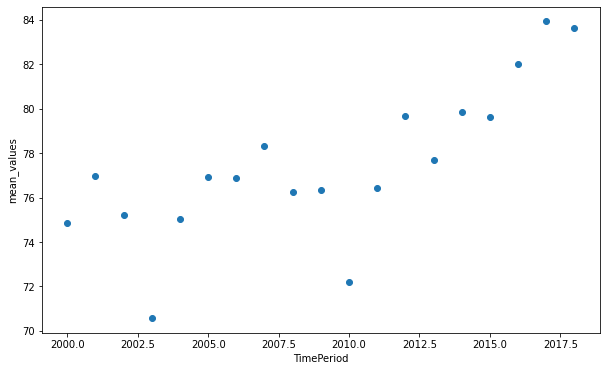

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(world_female_mean['TimePeriod'], world_female_mean['mean_values'])
plt.xlabel('TimePeriod')
plt.ylabel('mean_values')
plt.savefig('1.png')
plt.show()

Intercept: [-855.32105665]
Slope: [[0.46431763]]


Text(0, 0.5, 'Values')

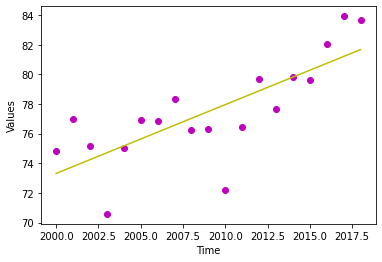

In [11]:
# LR to predict the future values 
from sklearn.linear_model import LinearRegression

X_WF = pd.DataFrame(world_female_mean['TimePeriod'])
Y_WF = pd.DataFrame(world_female_mean['mean_values'])

# #fit the points in the model
model = LinearRegression().fit(X_WF, Y_WF)

print('Intercept:', model.intercept_) #intercept
print('Slope:', model.coef_) # slope -m

# #plot the original points
plt.scatter(X_WF, Y_WF, color ='m')
# #plot the values estimated by model
plt.plot(X_WF, model.predict(X_WF), color='y')
plt.xlabel('Time')
plt.ylabel('Values')

In [12]:
# analysing male teacher trends
world_male_mean = mean_yearwise[(mean_yearwise['Sex']=='MALE') & (mean_yearwise['TimePeriod']!=2019)]
world_male_mean

,TimePeriod,Sex,mean_values
2,2000,MALE,63.790358
5,2001,MALE,66.670287
8,2002,MALE,63.993896
11,2003,MALE,62.354794
14,2004,MALE,63.797408
17,2005,MALE,66.594116
20,2006,MALE,67.727524
23,2007,MALE,70.749583
26,2008,MALE,69.190338
29,2009,MALE,68.359767


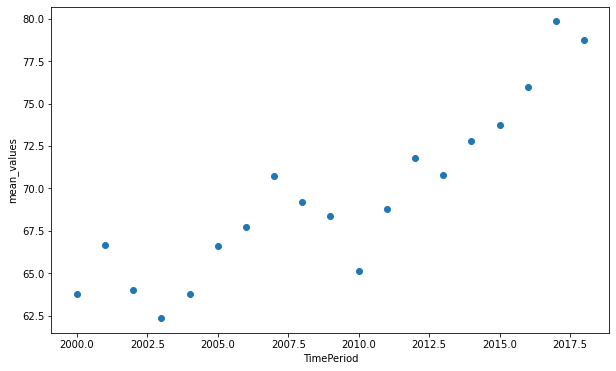

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(world_male_mean['TimePeriod'], world_male_mean['mean_values'])
plt.xlabel('TimePeriod')
plt.ylabel('mean_values')
plt.savefig('2.png')
plt.show()

Intercept: [-1546.31377317]
Slope: [[0.80429699]]


Text(0, 0.5, 'Values')

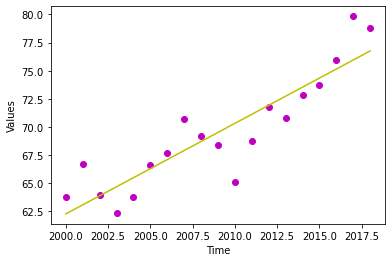

In [14]:
X_WM = pd.DataFrame(world_male_mean['TimePeriod'])
Y_WM = pd.DataFrame(world_male_mean['mean_values'])

# #fit the points in the model
model = LinearRegression().fit(X_WM, Y_WM)

print('Intercept:', model.intercept_) #intercept
print('Slope:', model.coef_) # slope -m

# #plot the original points
plt.scatter(X_WM, Y_WM, color ='m')
# #plot the values estimated by model
plt.plot(X_WM, model.predict(X_WM), color='y')
plt.xlabel('Time')
plt.ylabel('Values')

In [15]:
#Analysing youth and adults with information and technology skills
new_df = df[df["SeriesDescription"] == "Proportion of youth and adults with information and communications technology (ICT) skills, by sex and type of skill (%)"]
new_df

,Goal,Target,Indicator,SeriesDescription,GeoAreaName,TimePeriod,Value,Sex,Education level,Type of skill
87476,4,4.4,4.4.1,Proportion of youth and adults with informatio...,Albania,2019,16.12054,BOTHSEX,NaN,COPA
87477,4,4.4,4.4.1,Proportion of youth and adults with informatio...,Albania,2019,13.89042,BOTHSEX,NaN,SOFT
87478,4,4.4,4.4.1,Proportion of youth and adults with informatio...,Albania,2019,12.57493,FEMALE,NaN,SOFT
87479,4,4.4,4.4.1,Proportion of youth and adults with informatio...,Albania,2019,21.55040,MALE,NaN,TRAF
87480,4,4.4,4.4.1,Proportion of youth and adults with informatio...,Albania,2019,1.35666,FEMALE,NaN,PCPR
...,...,...,...,...,...,...,...,...,...,...
93400,4,4.4,4.4.1,Proportion of youth and adults with informatio...,Uzbekistan,2018,37.63104,FEMALE,NaN,CMFL
93401,4,4.4,4.4.1,Proportion of youth and adults with informatio...,Uzbekistan,2018,4.40000,BOTHSEX,NaN,TRAF
93402,4,4.4,4.4.1,Proportion of youth and adults with informatio...,Uzbekistan,2018,3.52701,FEMALE,NaN,TRAF
93403,4,4.4,4.4.1,Proportion of youth and adults with informatio...,Uzbekistan,2018,14.10000,BOTHSEX,NaN,EMAIL


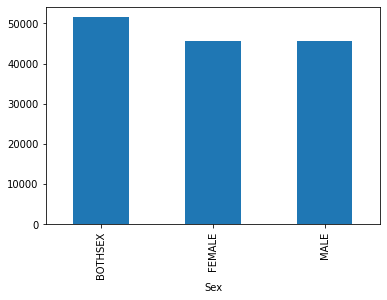

In [16]:
#Total number of people in 144 countries
by_gender_all = df.groupby('Sex')
by_gender_all.size().plot(kind='bar')

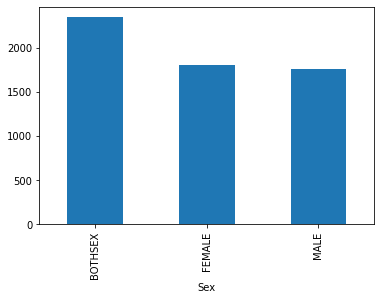

In [17]:
#Total number of people for ICT skills indicator
by_gender = new_df.groupby('Sex')
by_gender.size().plot(kind='bar')

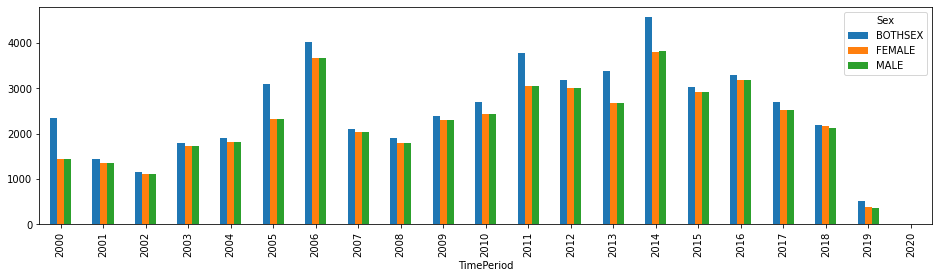

In [18]:
#Total number of people for 144 countries groupes by year and sex
by_year_gender_all = df.groupby(['TimePeriod','Sex'])
year_gen_sz_all = by_year_gender_all.size().unstack()
year_gen_sz_all.plot(kind='bar', figsize=(16,4))

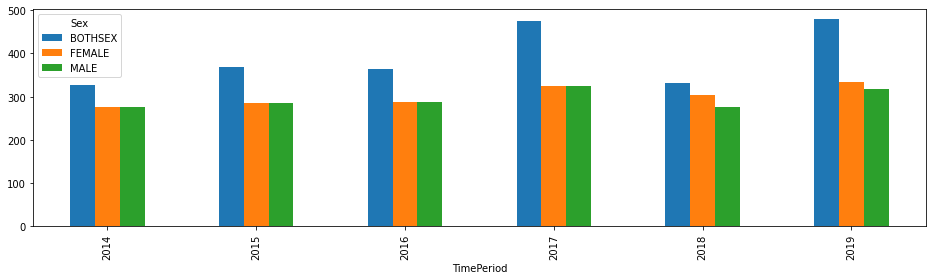

In [19]:
#Total number of people for ICT skills indicator groupes by year and sex
by_year_gender = new_df.groupby(['TimePeriod','Sex'])
year_gen_sz = by_year_gender.size().unstack()
year_gen_sz.plot(kind='bar', figsize=(16,4))

In [20]:
#Checking for the Na values
new_df.isnull().values.any()
new_df.isnull().sum()

Goal                    0
Target                  0
Indicator               0
SeriesDescription       0
GeoAreaName             0
TimePeriod              0
Value                   0
Sex                     0
Education level      5929
Type of skill           0
dtype: int64

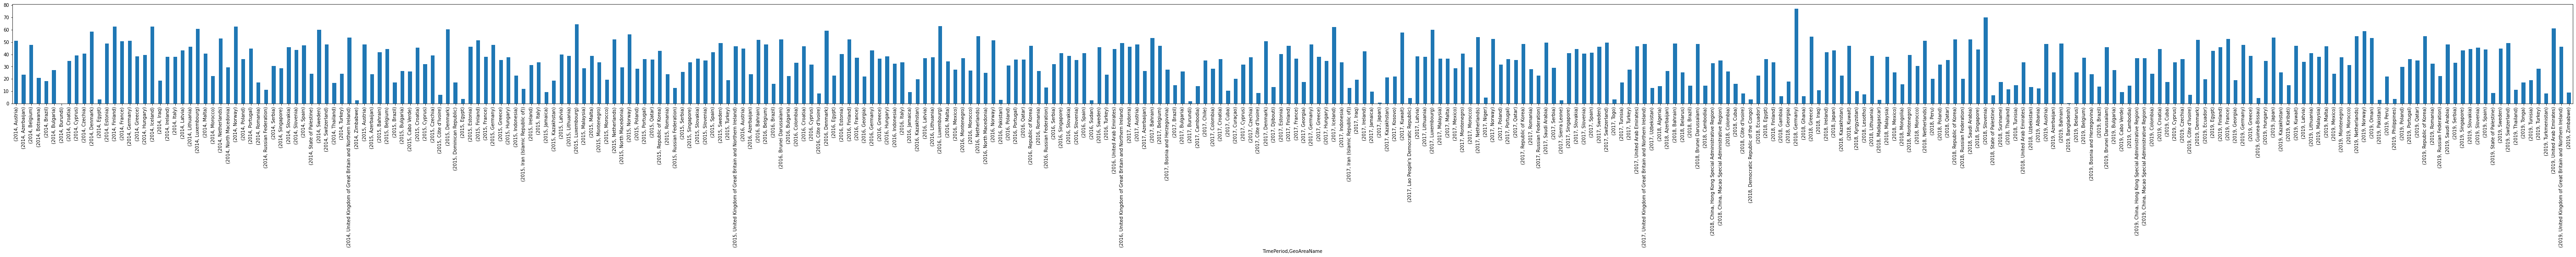

In [21]:
#Graph showing the year grouped with country vs mean of value
new_df.groupby(["TimePeriod", "GeoAreaName"]).mean()['Value'].plot(kind='bar', figsize=(100,4))

In [22]:
#New dataframe/subset of the selected 10 countries
options = ['China', 'Columbia', 'Congo', 'Egypt', 'Pakistan', 'Poland', 'Iraq', 'Mexico', 'Nigeria', 'Turkey']
# selecting rows based on condition
rslt_df = new_df[new_df['GeoAreaName'].isin(options)]
rslt_df

,Goal,Target,Indicator,SeriesDescription,GeoAreaName,TimePeriod,Value,Sex,Education level,Type of skill
89798,4,4.4,4.4.1,Proportion of youth and adults with informatio...,Iraq,2014,37.60000,BOTHSEX,NaN,EMAIL
89799,4,4.4,4.4.1,Proportion of youth and adults with informatio...,Iraq,2014,23.00000,BOTHSEX,NaN,SOFT
89800,4,4.4,4.4.1,Proportion of youth and adults with informatio...,Iraq,2014,4.70000,BOTHSEX,NaN,PCPR
89801,4,4.4,4.4.1,Proportion of youth and adults with informatio...,Iraq,2014,48.86000,BOTHSEX,NaN,CMFL
89802,4,4.4,4.4.1,Proportion of youth and adults with informatio...,Iraq,2014,6.90000,BOTHSEX,NaN,TRAF
...,...,...,...,...,...,...,...,...,...,...
93278,4,4.4,4.4.1,Proportion of youth and adults with informatio...,Egypt,2019,21.28713,BOTHSEX,NaN,EPRS
93279,4,4.4,4.4.1,Proportion of youth and adults with informatio...,Egypt,2019,18.58564,BOTHSEX,NaN,ARSP
93280,4,4.4,4.4.1,Proportion of youth and adults with informatio...,Egypt,2019,53.45752,BOTHSEX,NaN,INST
93281,4,4.4,4.4.1,Proportion of youth and adults with informatio...,Egypt,2019,58.80161,BOTHSEX,NaN,COPA


In [23]:
#Calculating world dataframe
world_df = df.loc[df['GeoAreaName'] == 'World']
world_df

,Goal,Target,Indicator,SeriesDescription,GeoAreaName,TimePeriod,Value,Sex,Education level,Type of skill
80340,4,4.2,4.2.1,Proportion of children aged 36−59 months who a...,World,2020,70.700000,FEMALE,NaN,NaN
80341,4,4.2,4.2.1,Proportion of children aged 36−59 months who a...,World,2020,67.800000,MALE,NaN,NaN
80342,4,4.2,4.2.1,Proportion of children aged 36−59 months who a...,World,2020,71.500000,BOTHSEX,NaN,NaN
80584,4,4.2,4.2.2,Participation rate in organized learning (one ...,World,2007,59.783967,BOTHSEX,NaN,NaN
80585,4,4.2,4.2.2,Participation rate in organized learning (one ...,World,2008,60.409840,MALE,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
178244,4,4.c,4.c.1,Proportion of teachers who have received at le...,World,2017,87.801930,FEMALE,PRIMAR,NaN
178245,4,4.c,4.c.1,Proportion of teachers who have received at le...,World,2017,86.017360,BOTHSEX,SECOND,NaN
178246,4,4.c,4.c.1,Proportion of teachers who have received at le...,World,2018,87.243190,FEMALE,PRIMAR,NaN
178247,4,4.c,4.c.1,Proportion of teachers who have received at le...,World,2018,81.131110,MALE,PRIMAR,NaN


In [24]:
#Female, Male data for the world
options=['FEMALE', 'MALE']
new_world = world_df[world_df['Sex'].isin(options)]
new_world

,Goal,Target,Indicator,SeriesDescription,GeoAreaName,TimePeriod,Value,Sex,Education level,Type of skill
80340,4,4.2,4.2.1,Proportion of children aged 36−59 months who a...,World,2020,70.700000,FEMALE,NaN,NaN
80341,4,4.2,4.2.1,Proportion of children aged 36−59 months who a...,World,2020,67.800000,MALE,NaN,NaN
80585,4,4.2,4.2.2,Participation rate in organized learning (one ...,World,2008,60.409840,MALE,NaN,NaN
80586,4,4.2,4.2.2,Participation rate in organized learning (one ...,World,2008,59.979328,FEMALE,NaN,NaN
80588,4,4.2,4.2.2,Participation rate in organized learning (one ...,World,2009,61.065593,MALE,NaN,NaN
80589,4,4.2,4.2.2,Participation rate in organized learning (one ...,World,2009,60.669312,FEMALE,NaN,NaN
80592,4,4.2,4.2.2,Participation rate in organized learning (one ...,World,2010,62.111000,MALE,NaN,NaN
80593,4,4.2,4.2.2,Participation rate in organized learning (one ...,World,2010,61.701992,FEMALE,NaN,NaN
80594,4,4.2,4.2.2,Participation rate in organized learning (one ...,World,2011,62.944741,FEMALE,NaN,NaN
80595,4,4.2,4.2.2,Participation rate in organized learning (one ...,World,2011,63.520387,MALE,NaN,NaN


In [25]:
# calculating yearwise means for 144 countries and converting this to a DF
yearwise_df_world = new_df.groupby(["TimePeriod", 'Sex']).mean()['Value']
mean_yearwise_world = yearwise_df_world.to_frame(name='mean_values').reset_index()
mean_yearwise_world

,TimePeriod,Sex,mean_values
0,2014,BOTHSEX,36.840304
1,2014,FEMALE,35.825799
2,2014,MALE,42.559776
3,2015,BOTHSEX,33.297050
4,2015,FEMALE,32.961191
5,2015,MALE,38.501645
6,2016,BOTHSEX,34.611584
7,2016,FEMALE,32.383440
8,2016,MALE,37.430316
9,2017,BOTHSEX,32.362798


In [30]:
#Calculating mean for female for 144 countries
world_female_mean_1 = mean_yearwise_world[(mean_yearwise_world['Sex']=='FEMALE') & (mean_yearwise_world['TimePeriod']!=2019)]
world_female_mean_1

,TimePeriod,Sex,mean_values
1,2014,FEMALE,35.825799
4,2015,FEMALE,32.961191
7,2016,FEMALE,32.383440
10,2017,FEMALE,29.424682
13,2018,FEMALE,22.443643


In [31]:
#Calculating mean for male for 144 countries
world_male_mean_1 = mean_yearwise_world[(mean_yearwise_world['Sex']=='MALE') & (mean_yearwise_world['TimePeriod']!=2019)]
world_male_mean_1

,TimePeriod,Sex,mean_values
2,2014,MALE,42.559776
5,2015,MALE,38.501645
8,2016,MALE,37.430316
11,2017,MALE,34.571972
14,2018,MALE,27.340885


In [32]:
#Calculating mean for bothsex for 144 countries
world_both_mean_1 = mean_yearwise_world[(mean_yearwise_world['Sex']=='BOTHSEX') & (mean_yearwise_world['TimePeriod']!=2019)]
world_both_mean_1

,TimePeriod,Sex,mean_values
0,2014,BOTHSEX,36.840304
3,2015,BOTHSEX,33.297050
6,2016,BOTHSEX,34.611584
9,2017,BOTHSEX,32.362798
12,2018,BOTHSEX,29.010649


In [33]:
# calculating yearwise means for 10 countries and converting this to a DF
yearwise_df = rslt_df.groupby(["TimePeriod", 'Sex']).mean()['Value']
mean_yearwise_selected = yearwise_df.to_frame(name='mean_values').reset_index()
mean_yearwise_selected

,TimePeriod,Sex,mean_values
0,2014,BOTHSEX,19.892249
1,2014,FEMALE,15.879698
2,2014,MALE,18.752209
3,2015,BOTHSEX,15.465932
4,2015,FEMALE,13.114311
5,2015,MALE,16.145639
6,2016,BOTHSEX,20.434951
7,2016,FEMALE,17.530325
8,2016,MALE,23.381060
9,2017,BOTHSEX,25.241145


In [34]:
#Analysis trends for female in the ICT skills for selected 10 countries
female_mean_selected = mean_yearwise_selected[(mean_yearwise_selected['Sex']=='FEMALE') & (mean_yearwise_selected['TimePeriod']!=2019)]
female_mean_selected

,TimePeriod,Sex,mean_values
1,2014,FEMALE,15.879698
4,2015,FEMALE,13.114311
7,2016,FEMALE,17.530325
10,2017,FEMALE,26.511419
13,2018,FEMALE,16.728139


In [35]:
#Analysis trends for male in the ICT skills for selected 10 countries
male_mean_selected = mean_yearwise_selected[(mean_yearwise_selected['Sex']=='MALE') & (mean_yearwise_selected['TimePeriod']!=2019)]
male_mean_selected

,TimePeriod,Sex,mean_values
2,2014,MALE,18.752209
5,2015,MALE,16.145639
8,2016,MALE,23.381060
11,2017,MALE,32.818014
14,2018,MALE,30.426548


In [36]:
#Analysis trends for Bothsex in the ICT skills for selected 10 countries
both_mean_selected = mean_yearwise_selected[(mean_yearwise_selected['Sex']=='BOTHSEX') & (mean_yearwise_selected['TimePeriod']!=2019)]
both_mean_selected

,TimePeriod,Sex,mean_values
0,2014,BOTHSEX,19.892249
3,2015,BOTHSEX,15.465932
6,2016,BOTHSEX,20.434951
9,2017,BOTHSEX,25.241145
12,2018,BOTHSEX,27.770417


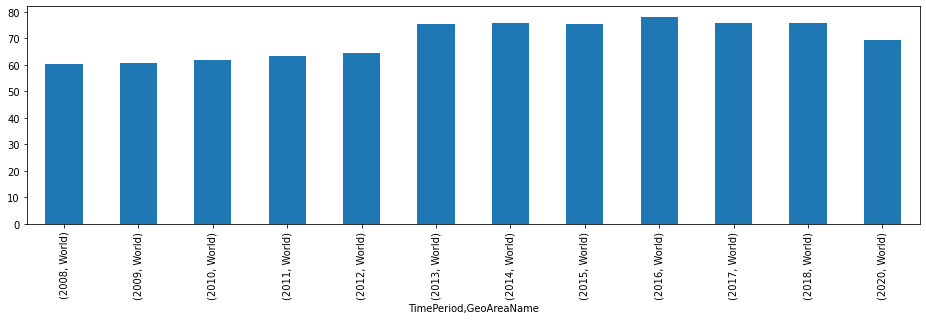

In [26]:
#World mean taking into considertaion Male, Female only
new_world.groupby(["TimePeriod", "GeoAreaName"]).mean()['Value'].plot(kind='bar', figsize=(16,4))

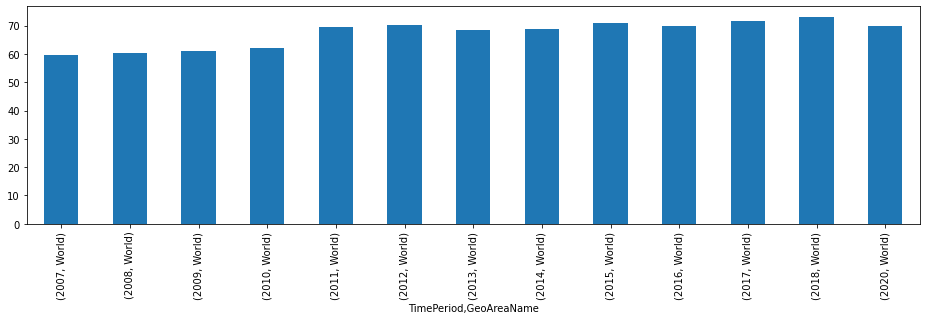

In [27]:
#World mean taking into considertaion Male, Female, Bothsex
world_df.groupby(["TimePeriod", "GeoAreaName"]).mean()['Value'].plot(kind='bar', figsize=(16,4))

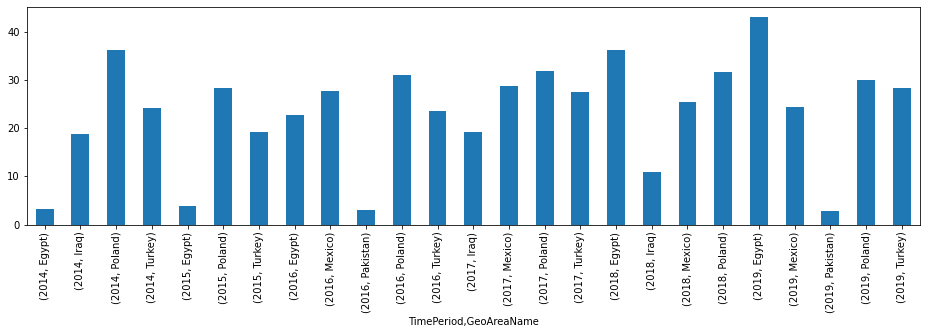

In [28]:
#10 countries mean taking into considertaion Male, Female, Bothsex
rslt_df.groupby(["TimePeriod", "GeoAreaName"]).mean()['Value'].plot(kind='bar', figsize=(16,4))

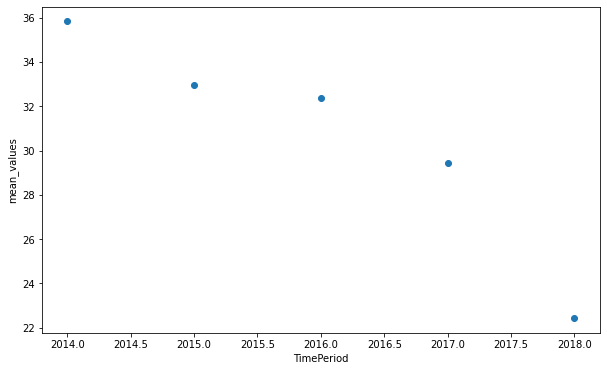

In [37]:
#Female mean (world) plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(world_female_mean_1['TimePeriod'], world_female_mean_1['mean_values'])
plt.xlabel('TimePeriod')
plt.ylabel('mean_values')
plt.savefig('scatter1.png')
plt.show()

Intercept: [6139.25320563]
Slope: [[-3.03008207]]


Text(0, 0.5, 'Values')

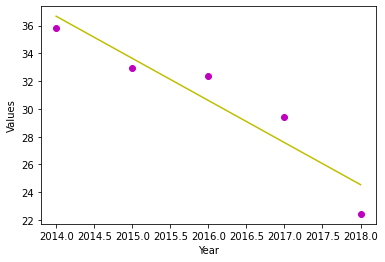

In [38]:
# LR to predict the future values 
from sklearn.linear_model import LinearRegression

X_WF = pd.DataFrame(world_female_mean_1['TimePeriod'])
Y_WF = pd.DataFrame(world_female_mean_1['mean_values'])

# #fit the points in the model
model = LinearRegression().fit(X_WF, Y_WF)

print('Intercept:', model.intercept_) #intercept
print('Slope:', model.coef_) # slope -m

# #plot the original points
plt.scatter(X_WF, Y_WF, color ='m')
# #plot the values estimated by model
plt.plot(X_WF, model.predict(X_WF), color='y')
plt.xlabel('Year')
plt.ylabel('Values')

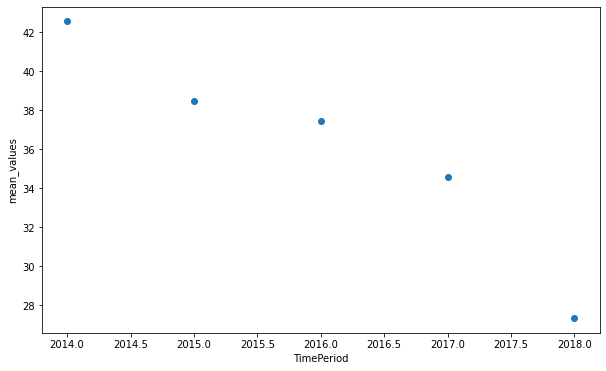

In [39]:
#Male mean (world) plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(world_male_mean_1['TimePeriod'], world_male_mean_1['mean_values'])
plt.xlabel('TimePeriod')
plt.ylabel('mean_values')
plt.savefig('scatter2.png')
plt.show()

Intercept: [6964.56003652]
Slope: [[-3.43674559]]


Text(0, 0.5, 'Values')

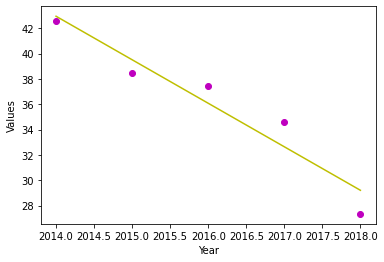

In [40]:
X_WM = pd.DataFrame(world_male_mean_1['TimePeriod'])
Y_WM = pd.DataFrame(world_male_mean_1['mean_values'])

# #fit the points in the model
model = LinearRegression().fit(X_WM, Y_WM)

print('Intercept:', model.intercept_) #intercept
print('Slope:', model.coef_) # slope -m

# #plot the original points
plt.scatter(X_WM, Y_WM, color ='m')
# #plot the values estimated by model
plt.plot(X_WM, model.predict(X_WM), color='y')
plt.xlabel('Year')
plt.ylabel('Values')

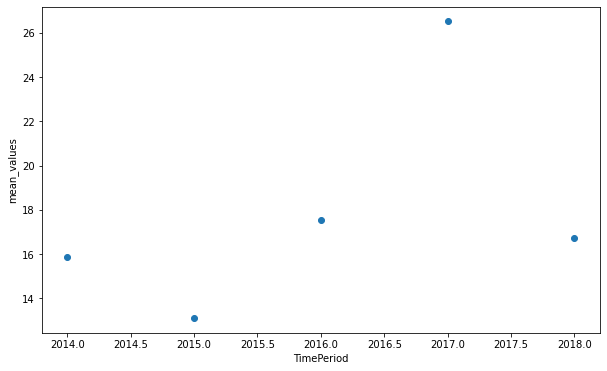

In [41]:
#Female mean for selected 10 countries plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(female_mean_selected['TimePeriod'], female_mean_selected['mean_values'])
plt.xlabel('TimePeriod')
plt.ylabel('mean_values')
plt.savefig('scatter3.png')
plt.show()

Intercept: [-3024.99547426]
Slope: [[1.50939893]]


Text(0, 0.5, 'Values')

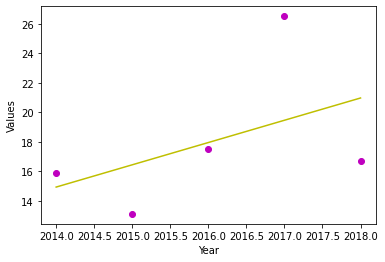

In [42]:
X_WM = pd.DataFrame(female_mean_selected['TimePeriod'])
Y_WM = pd.DataFrame(female_mean_selected['mean_values'])

# #fit the points in the model
model = LinearRegression().fit(X_WM, Y_WM)

print('Intercept:', model.intercept_) #intercept
print('Slope:', model.coef_) # slope -m

# #plot the original points
plt.scatter(X_WM, Y_WM, color ='m')
# #plot the values estimated by model
plt.plot(X_WM, model.predict(X_WM), color='y')
plt.xlabel('Year')
plt.ylabel('Values')

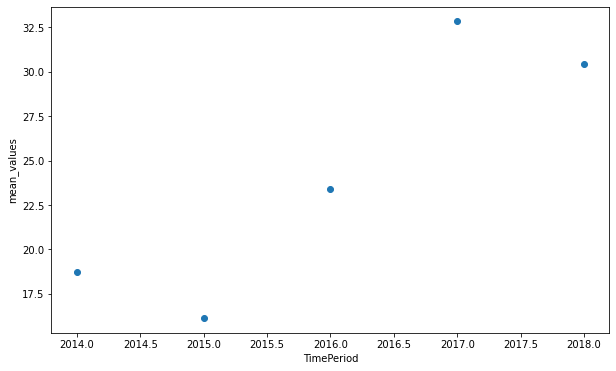

In [43]:
#Male mean for selected 10 countries plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(male_mean_selected['TimePeriod'], male_mean_selected['mean_values'])
plt.xlabel('TimePeriod')
plt.ylabel('mean_values')
plt.savefig('scatter4.png')
plt.show()

Intercept: [-8043.93961804]
Slope: [[4.00210531]]


Text(0, 0.5, 'Values')

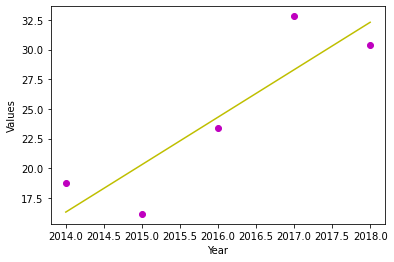

In [44]:
X_WM = pd.DataFrame(male_mean_selected['TimePeriod'])
Y_WM = pd.DataFrame(male_mean_selected['mean_values'])

# #fit the points in the model
model = LinearRegression().fit(X_WM, Y_WM)

print('Intercept:', model.intercept_) #intercept
print('Slope:', model.coef_) # slope -m

# #plot the original points
plt.scatter(X_WM, Y_WM, color ='m')
# #plot the values estimated by model
plt.plot(X_WM, model.predict(X_WM), color='y')
plt.xlabel('Year')
plt.ylabel('Values')